![panda](img/panda.png)
# Data Munging with Python and Pandas

Becky Sweger, 18F Engineering Team

## What is Pandas?

From the [docs](http://pandas.pydata.org/pandas-docs/stable/):

> pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive

Demo getting a dataframe:

`eiti = pd.read_excel('https://useiti.doi.gov/downloads/federal_revenue_onshore_acct-year_FY04-14_2015-11-20.xlsx')`

Slice:

`eiti[eiti['Total']>10000]`



# Pandas

* Series: 1-dimensional
    * think column in a spreadsheet
* Dataframe: 2-dimensional:
    * think spreadsheet
    * analagous to an R data.frame

![Pandas ecosystem](img/pandas-ecosystem.png)

## Pandas is good for:

* fast, repeatable data wrangling
* structured-ish data
* integration with Python data stack
* glue

# Array Programming

Pandas is built on top of [Numpy](http://www.numpy.org/), a Python library that enables array programming

* fast, efficient operations on arrays of homogeneous data
* you operate on aggregates of data; no explicit loops
* many operations performed via compiled code

# Data Munging

Step 0: if you're new to Python, skip the yak shaving and [download the Anaconda Python distribution](https://www.continuum.io/downloads "download Anaconda").

1. Get the data
2. Explore
3. Clean
4. Augment & Prep
5. Output

# Step 1: Get The Data

Pandas makes it easy to create a DataFrame from existing data.

The [U.S. Federal Budget](https://www.whitehouse.gov/omb/budget "The President's Budget")
* [Outlays](https://www.whitehouse.gov/omb/budget/Supplemental "supplemental materials") (scroll down to _Public Budget Database_)
* ["Deflators"](https://www.whitehouse.gov/omb/budget/Historicals "historical tables") (scroll down to _Table 10.1_)

In [ ]:
# import things

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [6]:
# create a DataFrame from the outlays .csv
outlays = pd.read_csv('data/outlays.csv')
outlays.head()      

,Agency Code,Agency Name,Bureau Code,Bureau Name,Account Code,Account Name,Treasury Agency Code,Subfunction Code,Subfunction Title,BEA Category,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
1,1,Legislative Branch,0,Legislative Branch,NaN,"Receipts, Central fiscal operations",NaN,908,Other interest,Net interest,...,0,0,0,0,0,0,0,0,0,0
2,1,Legislative Branch,0,Legislative Branch,241400.0,Charges for services to trust funds,NaN,803,Central fiscal operations,Mandatory,...,0,0,0,0,0,0,0,0,0,0
3,1,Legislative Branch,5,Senate,0.0,Senate,0.0,801,Legislative functions,Discretionary,...,0,0,0,0,0,0,0,0,0,0
4,1,Legislative Branch,5,Senate,100.0,"Compensation of Members, Senate",0.0,801,Legislative functions,Mandatory,...,"23,000","23,000","23,000","23,000","27,000","24,000","24,000","24,000","24,000","24,000"


In [7]:
# create a DataFrame from the "deflators" .xls  (requires xlrd library)
deflators = pd.read_excel('https://www.whitehouse.gov/sites/default/files/omb/budget/fy2017/assets/hist10z1.xls')
type(deflators)

pandas.core.frame.DataFrame

## Other things that can create a DataFrame

* Python-specific (_e.g._, tuples, lists, dictionaries, pickle)
* Relational database
* JSON
* HTML
* Stata/SAS
* HDF5
* MessagePack (experimental)
* Google's BigQuery (experimental)

More information: [IO Tools](http://pandas.pydata.org/pandas-docs/stable/io.html "Pandas IO Tools")

## Take a peek...

Some useful functions for a first look at your DataFrame:

* [head](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html "DataFrame.head")
* [tail](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html "DataFrame.tail")
* [iloc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html "pandas.DataFrame.iloc")
* [unique](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html "pandas.Series.unique")

See also:

* [Pandas docs: Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html "Pandas: indexing and selecting data")
* [Chris Albon's indexing and selecting examples](http://chrisalbon.com/python/pandas_indexing_selecting.html "Pandas indexing and selecting examples")

In [8]:
outlays.tail()

,Agency Code,Agency Name,Bureau Code,Bureau Name,Account Code,Account Name,Treasury Agency Code,Subfunction Code,Subfunction Title,BEA Category,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
5081,902,Undistributed Offsetting Receipts,0,Undistributed Offsetting Receipts,977120.0,"Interest, Special Worker's Compensation Expenses",16.0,902,Interest received by on-budget trust funds,Net interest,...,0,0,0,0,0,0,0,0,0,0
5082,902,Undistributed Offsetting Receipts,0,Undistributed Offsetting Receipts,977910.0,"Employing agency contributions, Miscellaneous ...",20.0,951,"Employer share, employee retirement (on-budget)",Mandatory,...,0,0,0,0,0,0,0,0,0,0
5083,902,Undistributed Offsetting Receipts,0,Undistributed Offsetting Receipts,977920.0,"Interest, Miscellaneous Trust Funds, Governmen...",20.0,902,Interest received by on-budget trust funds,Net interest,...,0,0,0,0,0,0,0,0,0,0
5084,902,Undistributed Offsetting Receipts,0,Undistributed Offsetting Receipts,997120.0,"Interest, Other DOD Trust Funds",17.0,902,Interest received by on-budget trust funds,Net interest,...,0,0,0,0,"-1,000","-1,000","-1,000","-1,000","-1,000","-1,000"
5085,930,Miscellaneous Receipts Below the Reporting Thr...,0,Miscellaneous Receipts Below the Reporting Thr...,901000.0,Miscellaneous Unconverted Offsetting Receipts,99.0,809,Deductions for offsetting receipts,Mandatory,...,"-7,000",0,"-8,000","-15,000",0,0,0,0,0,0


In [9]:
# grab first 3 and the last 2 rows of the deflators dataframe

deflators.iloc[[0,1,2,-2,-1]]

,Table 10.1—GROSS DOMESTIC PRODUCT AND DEFLATORS USED IN THE HISTORICAL TABLES: 1940–2021,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,(Fiscal Year 2009 = 1.000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fiscal Year,GDP (in billions of dollars),GDP (Chained) Price Index,Composite Outlay Deflators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Total,Total Defense,Total Non- defense,Payment for Individuals,NaN,NaN,Other Grants,Net Interest,Undis- tributed Offsetting Receipts,All Other,Addendum: Direct Capital,NaN,NaN
86,2021 estimate,22875.2,1.2294,1.2551,1.2355,1.2578,1.2584,1.2583,1.2589,1.361,1.2294,1.2834,1.259,1.1983,1.1927,1.2137
87,Note: Constant dollar research and development...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Explore

What kind of pain are you in for?

In [11]:
# see the column names
outlays.columns

Index(['Agency Code', 'Agency Name', 'Bureau Code', 'Bureau Name',
       'Account Code', 'Account Name', 'Treasury Agency Code',
       'Subfunction Code', 'Subfunction Title', 'BEA Category',
       'Grant/non-grant split', 'On- or Off- Budget', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', 'TQ', '1977', '1978', '1979', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [12]:
# see datatypes and high-level view of missing data
# watch points:
# - is the number of rows in the ballpark?
# - are there codes coming in as numeric datatypes?
# - are there columns with unexpected null values?
# - are any of these column names going to be annoying?
# - NumPy loves floats! Are you planning to do any math?

outlays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 73 columns):
Agency Code              5086 non-null int64
Agency Name              5086 non-null object
Bureau Code              5086 non-null int64
Bureau Name              5086 non-null object
Account Code             5048 non-null float64
Account Name             5086 non-null object
Treasury Agency Code     4944 non-null float64
Subfunction Code         5086 non-null int64
Subfunction Title        5086 non-null object
BEA Category             5086 non-null object
Grant/non-grant split    5086 non-null object
On- or Off- Budget       5086 non-null object
1962                     5086 non-null object
1963                     5086 non-null object
1964                     5086 non-null object
1965                     5086 non-null object
1966                     5086 non-null object
1967                     5086 non-null object
1968                     5086 non-null object
1969                

In [14]:
# math!

outlays.describe()

/Users/rebeccasweger/miniconda3/envs/pandas-munging/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Agency Code,Bureau Code,Account Code,Treasury Agency Code,Subfunction Code
count,5086.000000,5086.000000,5048.00000,4944.000000,5086.000000
mean,106.276838,19.282540,166440.52912,44.419094,484.107943
std,207.342130,25.213866,285555.50454,32.739532,249.309125
min,1.000000,0.000000,0.00000,0.000000,51.000000
25%,9.000000,0.000000,NaN,NaN,302.000000
50%,15.000000,9.000000,NaN,NaN,452.000000
75%,27.000000,30.000000,NaN,NaN,751.000000
max,930.000000,99.000000,997200.00000,99.000000,959.000000


## Fixin' to do

* Override data types
* Retain leading zeroes
* Skip header and footer rows
* Convert whitespaces to null/NaN
* Use your own column names
* Exclude unwanted columns
* Ignore blank rows (or not!)
* [And more](http://pandas.pydata.org/pandas-docs/stable/io.html "Pandas IO Tools")

# Step 2A: Get the Data Again

Yeah, you'll probably have to do that.

In [15]:
# some better data types
# - force selected columns to string/object
# - thousands parameter ensures incoming numbers w/ commas are not interpreted as string

outlays = pd.read_csv(
    'data/outlays.csv',
    thousands=',',
    dtype={'Agency Code': str,
           'Bureau Code': str,
           'Account Code': str,
           'Treasury Agency Code': str,
           'Subfunction Code': str}
    )
print(outlays['Agency Code'].head())
outlays['1973'].describe()

0    001
1    001
2    001
3    001
4    001
Name: Agency Code, dtype: object


count    5.086000e+03
mean     4.831051e+04
std      9.241268e+05
min     -8.294670e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.295570e+07
Name: 1973, dtype: float64

In [16]:
# take 2: deflators
# - only take the 1st 3 columns
# - specify better header names
# - ignore header rows in spreadsheet
# - ignore the footer row

deflators = pd.read_excel('data/hist10z1.xls', 
                  parse_cols=2,
                  names=['fiscal_year', 'gdp_billions', 'deflator'],
                  header=None,
                  skiprows=5,
                  skip_footer=1
                 )
deflators.head()

,fiscal_year,gdp_billions,deflator
0,1940,98.2,0.0809
1,1941,116.2,0.0840
2,1942,147.7,0.0902
3,1943,184.6,0.0961
4,1944,213.8,0.0995


# Step 3: Clean

The annoying stuff.

## For example

* [Renaming](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html "pandas renaming")
* [Handling missing values](http://pandas.pydata.org/pandas-docs/stable/missing_data.html "pandas: working with missing data")
* Delete unecessary data
* [Clean up strings](http://pandas.pydata.org/pandas-docs/stable/text.html "working with strings")
* [Tidy data](https://www.jstatsoft.org/article/view/v059i10 "Tidy Data by Hadley Wickham")


## Clean up outlays

In [17]:
# Rename some columns

outlays = outlays.rename(columns = {
        'Agency Code': 'agency_code',
        'Agency Name': 'agency_name',
        'Bureau Code': 'bureau_code',
        'Bureau Name': 'bureau_name',
        'Account Code': 'account_code',
        'Account Name': 'account_name',
        'Treasury Agency Code': 'treasury_agency_code',
        'Subfunction Code': 'subfunction_code',
        'Subfunction Title': 'subfunction_name',
        'BEA Category': 'bea_category',
        'Grant/non-grant split': 'grant_split',
        'On- or Off- Budget': 'on_off_budget'
    })
outlays.columns

Index(['agency_code', 'agency_name', 'bureau_code', 'bureau_name',
       'account_code', 'account_name', 'treasury_agency_code',
       'subfunction_code', 'subfunction_name', 'bea_category', 'grant_split',
       'on_off_budget', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', 'TQ',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [18]:
# Extraneous information

del outlays['TQ']

In [19]:
# Missing values

print(outlays[['account_code', 'treasury_agency_code', '2012']].head(2))
outlays = outlays.fillna({
        'account_code': 'missing',
        'treasury_agency_code': 'missing',
        '1962': 0 # not needed here, but included as an example
    })
print(outlays[['account_code', 'treasury_agency_code', '2012']].head(2))

  account_code treasury_agency_code  2012
0          NaN                  NaN     0
1          NaN                  NaN     0
  account_code treasury_agency_code  2012
0      missing              missing     0
1      missing              missing     0


In [20]:
# string clean-up
print(pd.unique(outlays.account_name.ravel()))
outlays.account_name = outlays.account_name.str.strip().str.lower()
print(pd.unique(outlays.account_name.ravel()))

# oops capitalize DOD again
outlays.account_name = outlays.account_name.str.replace(' dod ', ' DOD ') # regex works too
print(pd.unique(outlays.account_name.ravel()))

outlays.subfunction_title = outlays.account_name.str.strip().str.lower()
outlays.bea_category = outlays.bea_category.str.lower()

['Receipts, Central fiscal operations'
 'Charges for services to trust funds' 'Senate' ...,
 'Interest, Miscellaneous Trust Funds, Government-wide'
 'Interest, Other DOD Trust Funds'
 'Miscellaneous Unconverted Offsetting Receipts']
['receipts, central fiscal operations'
 'charges for services to trust funds' 'senate' ...,
 'interest, miscellaneous trust funds, government-wide'
 'interest, other dod trust funds'
 'miscellaneous unconverted offsetting receipts']
['receipts, central fiscal operations'
 'charges for services to trust funds' 'senate' ...,
 'interest, miscellaneous trust funds, government-wide'
 'interest, other DOD trust funds'
 'miscellaneous unconverted offsetting receipts']


In [21]:
# get discretionary spending only

disc = outlays[outlays['bea_category'] == 'discretionary']
# gut check number of rows
len(disc.index)

2423

## Clean up deflators

In [22]:
# clean up year column
# - get rid of the "estimate" text by applying a function to the fiscal_year Series

print(deflators.fiscal_year.unique())
deflators.fiscal_year = deflators.fiscal_year.map(lambda x: x[:4])
print('\n{}'.format(deflators.fiscal_year.unique()))

['1940' '1941' '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949'
 '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959'
 '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' 'TQ' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989'
 '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016 estimate' '2017 estimate'
 '2018 estimate' '2019 estimate' '2020 estimate' '2021 estimate']

['1940' '1941' '1942' '1943' '1944' '1945' '1946' '1947' '1948' '1949'
 '1950' '1951' '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959'
 '1960' '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969'
 '1970' '1971' '1972' '1973' '1974' '1975' '1976' 'TQ' '1977' '1978' '1979'
 '1980' '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '19

## Step 3A: Tidy Data 

> 
> **_Datasets are often constructed in bizarre ways_**
> 

\- Hadley Wickham, in his 2014 paper _Tidy Data_ ([Journal of Statistical Software, August 2014](https://www.jstatsoft.org/article/view/v059i10))

### Principles of Tidy Data

* each variable is a column
* each observation is a row
* each type of observational unit is a table
* easy to model, manipulate, and visualize

In [24]:
# tidy the outlays (aka spending) dataset
# - variables = agency, bureau, account, year, subfunction, etc.
# - observation = dollar amount

# list of dataframe columns to use as identifier variables
# (all columns not listed will be unpivoted and added an additional identifier columm)
variables = ['agency_code', 'agency_name', 'bureau_code', 'bureau_name', 'account_code', 'account_name', 'treasury_agency_code', 'subfunction_code', 'subfunction_name', 'bea_category', 'grant_split', 'on_off_budget'] 
outlays = pd.melt(outlays,
               id_vars=variables,
               # name of the new, unpivoted identifier column
               var_name='fiscal_year',
               # name of the value column for the unpivoted data
               value_name='amount'
              )

outlays.head()

,agency_code,agency_name,bureau_code,bureau_name,account_code,account_name,treasury_agency_code,subfunction_code,subfunction_name,bea_category,grant_split,on_off_budget,fiscal_year,amount
0,001,Legislative Branch,00,Legislative Branch,missing,"receipts, central fiscal operations",missing,803,Central fiscal operations,mandatory,Nongrant,On-budget,1962,-628
1,001,Legislative Branch,00,Legislative Branch,missing,"receipts, central fiscal operations",missing,908,Other interest,net interest,Nongrant,On-budget,1962,0
2,001,Legislative Branch,00,Legislative Branch,241400,charges for services to trust funds,missing,803,Central fiscal operations,mandatory,Nongrant,On-budget,1962,0
3,001,Legislative Branch,05,Senate,0000,senate,00,801,Legislative functions,discretionary,Nongrant,On-budget,1962,26946
4,001,Legislative Branch,05,Senate,0100,"compensation of members, senate",00,801,Legislative functions,mandatory,Nongrant,On-budget,1962,0


### Useful Pandas Tidy-ing Functions

* [melt](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html "pandas.melt")
* [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html "pandas.DataFrame.stack")
* [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html "pandas.DataFrame.unstack")
* [pivot_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html "pandas.pivot_table")

See also:
* Pandas docs: [Reshaping and pivot tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html "Pandas: reshaping and pivot tables")
* [Tidy Data in Python](https://www.ibm.com/developerworks/community/blogs/jfp/entry/Tidy_Data_In_Python?lang=en "Tidy Data in Python")



# Step 4: Fun Stuff

## Calculating New Columns

We need inflation-adjusted amounts to look at spending trends over time.

In [26]:
# merge discretionary outlays and deflators dataframes
# - by default Pandas will use like column names as the merge key
# - this is very intuitive for SQL nerds

outlays = outlays.merge(deflators, how='left')
outlays.head()

,agency_code,agency_name,bureau_code,bureau_name,account_code,account_name,treasury_agency_code,subfunction_code,subfunction_name,bea_category,grant_split,on_off_budget,fiscal_year,amount,gdp_billions,deflator
0,001,Legislative Branch,00,Legislative Branch,missing,"receipts, central fiscal operations",missing,803,Central fiscal operations,mandatory,Nongrant,On-budget,1962,-628,586.9,0.1783
1,001,Legislative Branch,00,Legislative Branch,missing,"receipts, central fiscal operations",missing,908,Other interest,net interest,Nongrant,On-budget,1962,0,586.9,0.1783
2,001,Legislative Branch,00,Legislative Branch,241400,charges for services to trust funds,missing,803,Central fiscal operations,mandatory,Nongrant,On-budget,1962,0,586.9,0.1783
3,001,Legislative Branch,05,Senate,0000,senate,00,801,Legislative functions,discretionary,Nongrant,On-budget,1962,26946,586.9,0.1783
4,001,Legislative Branch,05,Senate,0100,"compensation of members, senate",00,801,Legislative functions,mandatory,Nongrant,On-budget,1962,0,586.9,0.1783


In [28]:
# Add calculated column to represent spending amount in 2009 dollars

outlays['amount_adj'] = outlays.amount / outlays.deflator
outlays[['fiscal_year', 'amount', 'amount_adj']].head()

,fiscal_year,amount,amount_adj
0,1962,-628,-3522.153674
1,1962,0,0.000000
2,1962,0,0.000000
3,1962,26946,151127.313517
4,1962,0,0.000000


## Grouping

Summarize spending by category.

In [30]:
# get a list of budget function codes from sqlite & tweak to use as a lookup

from sqlalchemy import create_engine
db_engine = create_engine('sqlite:///data/pandas_data_munging.db')
functions = pd.read_sql_query(
    'SELECT budget_function_code, budget_function_desc FROM budget_function', db_engine
)

# index/sort the dataframe by budget_function_code
functions = functions.set_index(keys='budget_function_code').sort_index()
functions.head()

,budget_function_desc
budget_function_code,
010,national defense
150,international affairs
250,"general science, space, and technology"
270,energy
300,natural resources and environment


In [31]:
# use the budget function information from sqllite to add this
# higher-level category to our discretionary spending dataframe
# (might not be the best approach but demos a few Pandas things)

def get_budget_function(sf):
    i = functions.index.get_loc(sf, method='ffill')
    return functions.iloc[i].budget_function_desc

subfunctions = pd.DataFrame(
    outlays.subfunction_code.unique(), 
    columns=['subfunction_code']
)
subfunctions['function_name'] = subfunctions.subfunction_code.map(
    get_budget_function)
outlays = outlays.merge(subfunctions, how='left')
outlays[['subfunction_name', 'function_name']].tail()

,subfunction_name,function_name
305155,Interest received by on-budget trust funds,net interest
305156,"Employer share, employee retirement (on-budget)",undistributed offsetting receipts
305157,Interest received by on-budget trust funds,net interest
305158,Interest received by on-budget trust funds,net interest
305159,Deductions for offsetting receipts,general government


In [32]:
# group spending by year and category
grouped = outlays.groupby(['fiscal_year', 'function_name'])
 
grouped.agg({'amount_adj': 'sum'}).tail(10)

amount_adj
fiscal_year function_name                                  
2021        income security                    4.822165e+08
            international affairs              4.254514e+07
            medicare                           6.109208e+08
            national defense                   4.981617e+08
            natural resources and environment  3.746543e+07
            net interest                       4.670408e+08
            social security                    9.999252e+08
            transportation                     1.055791e+08
            undistributed offsetting receipts -8.464698e+07
            veterans benefits and services     1.696852e+08

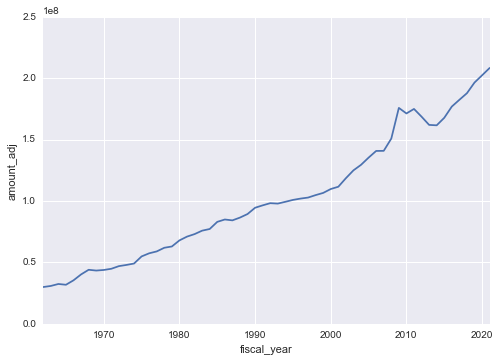

In [33]:
# use Seaborn library to plot a Pandas DataFrame
plot_df = outlays[['fiscal_year', 'function_name', 'amount_adj']]
plot_group = plot_df.groupby(['fiscal_year', 'function_name']).sum().reset_index()
sns.set(style="darkgrid")
ax = sns.tsplot(data=plot_group, time='fiscal_year', unit='function_name', value='amount_adj', err_style=None)

In [34]:
# group by years and calculate spending as % of GDP

by_year = outlays.groupby('fiscal_year')
def percent_gdp(group):
    spending = group['amount'] * 1000
    gdp = group['gdp_billions'] * 1000000000
    return spending.sum() / gdp.max() * 100

by_year.apply(percent_gdp)

fiscal_year
1962    18.200926
1963    17.974470
1964    17.880235
1965    16.635402
1966    17.205812
1967    18.786000
1968    19.808094
1969    18.694900
1970    18.649245
1971    18.777101
1972    18.916034
1973    18.120003
1974    18.123995
1975    20.634066
1976    20.767043
1977    20.174431
1978    20.136330
1979    19.611995
1980    21.129200
1981    21.611030
1982    22.503478
1983    22.828060
1984    21.549409
1985    22.160555
1986    21.833331
1987    20.996192
1988    20.647828
1989    20.533992
1990    21.184752
1991    21.672731
1992    21.469983
1993    20.741814
1994    20.308321
1995    19.987631
1996    19.559104
1997    18.873963
1998    18.453321
1999    17.894348
2000    17.628249
2001    17.632906
2002    18.487749
2003    19.059502
2004    18.966969
2005    19.178960
2006    19.401594
2007    19.051212
2008    20.217348
2009    24.403570
2010    23.361010
2011    23.428111
2012    22.068427
2013    20.939666
2014    20.403957
2015    20.716784
2016    21.39079

## Useful tools:

* [Applying operations over pandas DataFrames](http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html "Applying operations over Pandas DataFrames")
* Pandas docs: [apply-split-combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html "Pandas: apply-split-combine")
* Pandas docs: [computational tools](http://pandas.pydata.org/pandas-docs/stable/computation.html "Pandas: computational tools") (includes info on percent change, correlation, window functions)
* Pandas docs: [time series/date functionality](http://pandas.pydata.org/pandas-docs/stable/timeseries.html "Pands: time series")

# Step 5: Output

In [35]:
# filter out the columns we don't want to write out
# (ran out of time to find a way to get rid of both columns in one line)
outlays_tidier = outlays.ix[:, outlays.columns != 'deflator']
outlays_tidier = outlays.ix[:, outlays.columns != 'gdp_billions']

# write to a .csv
outlays_tidier.to_csv('data/outlays_done.csv', index=False)

In [36]:
# dump to SQL db

db_engine = create_engine('sqlite:///data/pandas_data_munging.db')
outlays_tidier.to_sql(
    'outlays',
    db_engine,
    if_exists='replace',
    index=False
)

# Resources

* Python for Data Analysis (by Wes McKinney): http://shop.oreilly.com/product/0636920023784.do
* Common Excel Tasks Demonstrated in Pandas: http://pbpython.com/excel-pandas-comp.html
* Pandas Cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Useful Pandas Snippets: https://gist.github.com/bsweger/e5817488d161f37dcbd2
* [Chris Albon's](http://chrisalbon.com/) series of tutorials (scroll down to _Data Wrangling_)
* Pandas docs: [how to do SQL operations in Pandas](http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html)
* Giant panda image courtesy: http://www.clipartlord.com/2015/11/23/free-giant-panda-clip-art-3/